In [1]:
# Loading libraries
import random
import matplotlib.pyplot as plt             # Library used for plotting
from matplotlib.patches import Rectangle    # Module to plot a rectangle in the image
import urllib.request                       # Library to download data
import numpy as np                          # Library for array manipulation
import seaborn as sn                        # Library for advanced plotting
import pandas as pd                         # Library to manipulate data frames
import tifffile                             # Library to store numpy arrays as TIFF
import pathlib                              # Library to work with file paths
from pathlib import Path                    # Library to work with file paths
import skimage                              # Library for image manipulation. scikit-image
from skimage.io import imread               # Module from skimage
from matplotlib import animation            # Module to plot animations

In [3]:
img_0 = []
for i in range(6):
    figName = './NoDrug/rep1_FOV' + str(i+1) + '.tif'
    img = imread(str(figName))
    img_0.append(img)


In [14]:
img_3 = []
for i in range(6):
    figName = './Drug3_1000nM/rep1_FOV' + str(i+1) + '.tif'
    img = imread(str(figName))
    img_3.append(img)

In [6]:
img_0[0].shape

(21, 650, 650, 3)

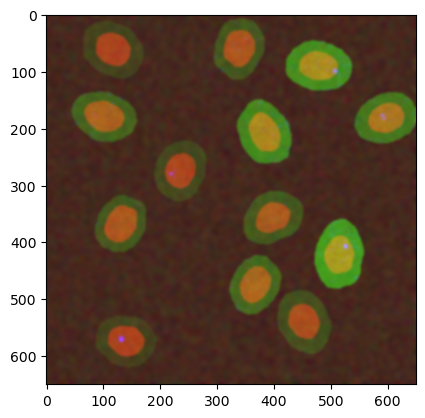

In [9]:
plt.imshow(img_0[0][0])

In [ ]:
np.max()

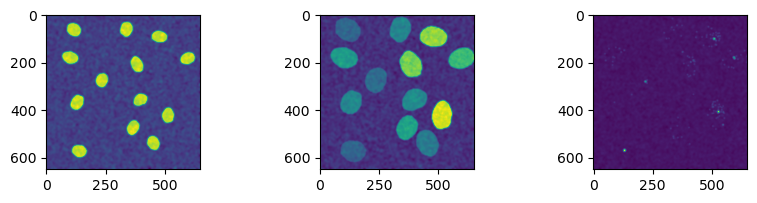

In [10]:
fig, ax = plt.subplots(1,3, figsize=(10,2))
colors = ['red', 'green', 'blue']
for i in range(3):
    ax[i].imshow(img_0[0][0,:,:,i])

In [13]:
fig,axes = plt.subplots(1,3,dpi=120,figsize=(8,3))
i=0
img = img_0[3]
# Define inital frames
Red = img[i,:,:,0]
im1 = axes[0].imshow(Red,cmap='Reds_r')
Green = img[i,:,:,1]
im2 = axes[1].imshow(Green,cmap='Greens_r')
Blue = img[i,:,:,2]
im3 =  axes[2].imshow(Blue,cmap='Blues_r')
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')

def movieFrame(i):
  Red = img[i,:,:,0]
  Green = img[i,:,:,1]
  Blue = img[i,:,:,2]
  images = [Red,Green,Blue]
  image_handles = [im1,im2,im3]
  for k,image_n in enumerate(images):
    image_handles[k].set_array(images[k])
  return image_handles

plt.close()
anim = animation.FuncAnimation(fig, movieFrame, frames=img.shape[0], interval=20, blit=True)
from IPython.display import HTML
HTML(anim.to_html5_video())

In [15]:
fig,axes = plt.subplots(1,3,dpi=120,figsize=(8,3))
i=0
img = img_3[3]
# Define inital frames
Red = img[i,:,:,0]
im1 = axes[0].imshow(Red,cmap='Reds_r')
Green = img[i,:,:,1]
im2 = axes[1].imshow(Green,cmap='Greens_r')
Blue = img[i,:,:,2]
im3 =  axes[2].imshow(Blue,cmap='Blues_r')
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')

def movieFrame(i):
  Red = img[i,:,:,0]
  Green = img[i,:,:,1]
  Blue = img[i,:,:,2]
  images = [Red,Green,Blue]
  image_handles = [im1,im2,im3]
  for k,image_n in enumerate(images):
    image_handles[k].set_array(images[k])
  return image_handles

plt.close()
anim = animation.FuncAnimation(fig, movieFrame, frames=img.shape[0], interval=20, blit=True)
from IPython.display import HTML
HTML(anim.to_html5_video())

In [ ]:
# load the videos from the dataset as 3 channels, with each channel having 21 frames. These frames represent time.
# For the red channel, we want to set a threshold to remove noise in the image red: set a thrshold to remove noise to create the mask (binary) -> number of viable cells
# nucleus size (area of 1s/2s/.../ns)

# green: cell size (mask, binary)
# average of intensity of each cell -> protein concentration of each cell (multiply mask of red)

# blue: (Mask)1.transcription sites (set intensity threshold to capture brightest), 2.mRNA (the dimmer dots)
# transcription sites found by subset of time frame (linspace) or maximum throughout all time
# blue: number of mRNA in nucleus (red True/1 multiply blue mask2(binary with threshold))
# number of mRNA in cytoplasm (green subtract red True/1 multiply blue mask1/ total - number in nucleus)
